Can we predict whether someone is an extrovert or an introvert based on their daily behavior and social patterns?

In [3]:
import pandas as pd
import os

# Load the dataset

df = pd.read_csv('/Users/yashsmacbook/Downloads/personality_dataset.csv')

# Show basic information and first few rows
df_info = df.info()
df_preview = df.head()

df.shape, df.isnull().sum(), df.dtypes, df_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


((2900, 8),
 Time_spent_Alone             63
 Stage_fear                   73
 Social_event_attendance      62
 Going_outside                66
 Drained_after_socializing    52
 Friends_circle_size          77
 Post_frequency               65
 Personality                   0
 dtype: int64,
 Time_spent_Alone             float64
 Stage_fear                    object
 Social_event_attendance      float64
 Going_outside                float64
 Drained_after_socializing     object
 Friends_circle_size          float64
 Post_frequency               float64
 Personality                   object
 dtype: object,
    Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
 0               4.0         No                      4.0            6.0   
 1               9.0        Yes                      0.0            0.0   
 2               9.0        Yes                      1.0            2.0   
 3               0.0         No                      6.0            7.0   
 4            

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your original DataFrame
# Copy dataset for processing
df_processed = df.copy()

# 1. Handle missing values
# Numerical columns: use mean imputation
num_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='mean')
df_processed[num_cols] = num_imputer.fit_transform(df_processed[num_cols])

# Categorical columns: use mode imputation
cat_cols = ['Stage_fear', 'Drained_after_socializing']
cat_imputer = SimpleImputer(strategy='most_frequent')
df_processed[cat_cols] = cat_imputer.fit_transform(df_processed[cat_cols])

# 2. Encode categorical variables
# Encode Yes/No to 1/0
yes_no_cols = ['Stage_fear', 'Drained_after_socializing']
for col in yes_no_cols:
    df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

# Encode target variable: Extrovert -> 1, Introvert -> 0
label_encoder = LabelEncoder()
df_processed['Personality'] = label_encoder.fit_transform(df_processed['Personality'])

# Show processed data preview
print("Cleaned and Encoded Dataset:")
print(df_processed.head())


Cleaned and Encoded Dataset:
   Time_spent_Alone  Stage_fear  Social_event_attendance  Going_outside  \
0               4.0           0                      4.0            6.0   
1               9.0           1                      0.0            0.0   
2               9.0           1                      1.0            2.0   
3               0.0           0                      6.0            7.0   
4               3.0           0                      9.0            4.0   

   Drained_after_socializing  Friends_circle_size  Post_frequency  Personality  
0                          0                 13.0             5.0            0  
1                          1                  0.0             3.0            1  
2                          1                  5.0             2.0            1  
3                          0                 14.0             8.0            0  
4                          0                  8.0             5.0            0  


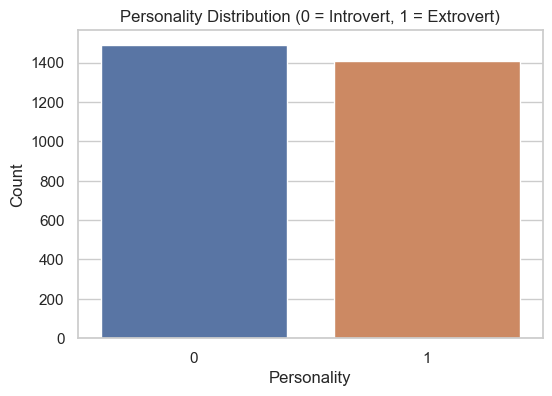

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


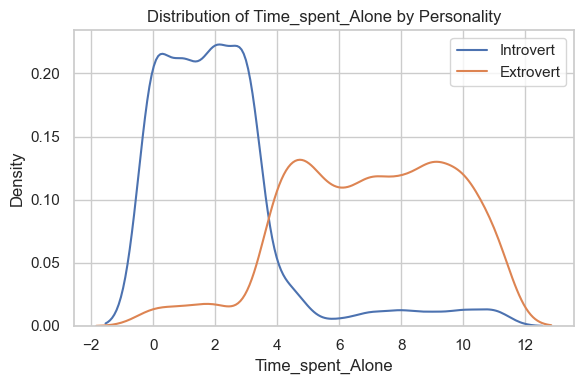

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


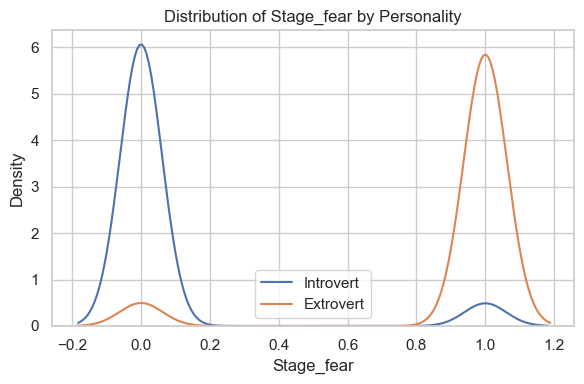

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


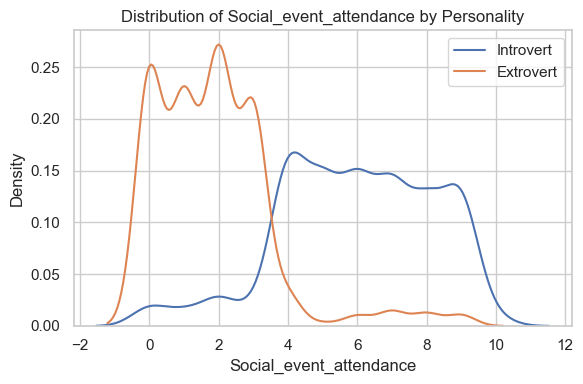

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


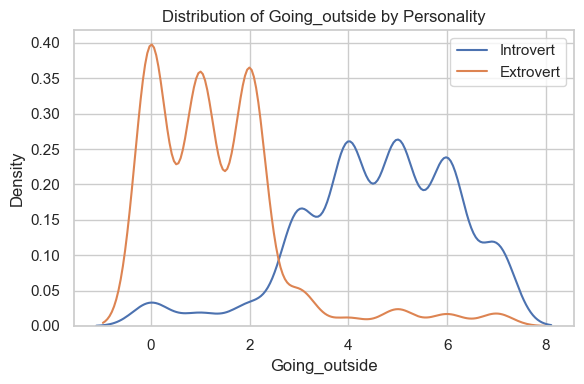

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


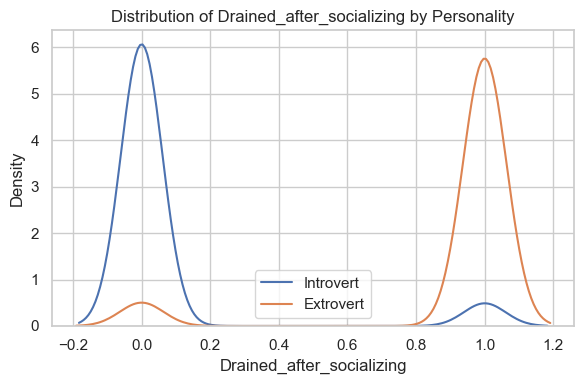

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


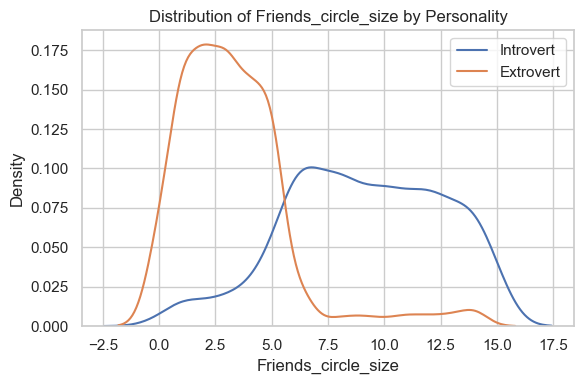

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


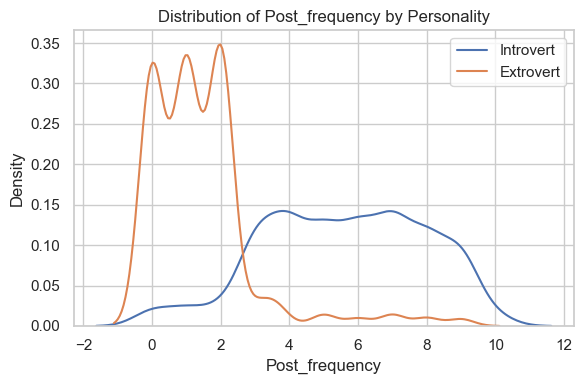

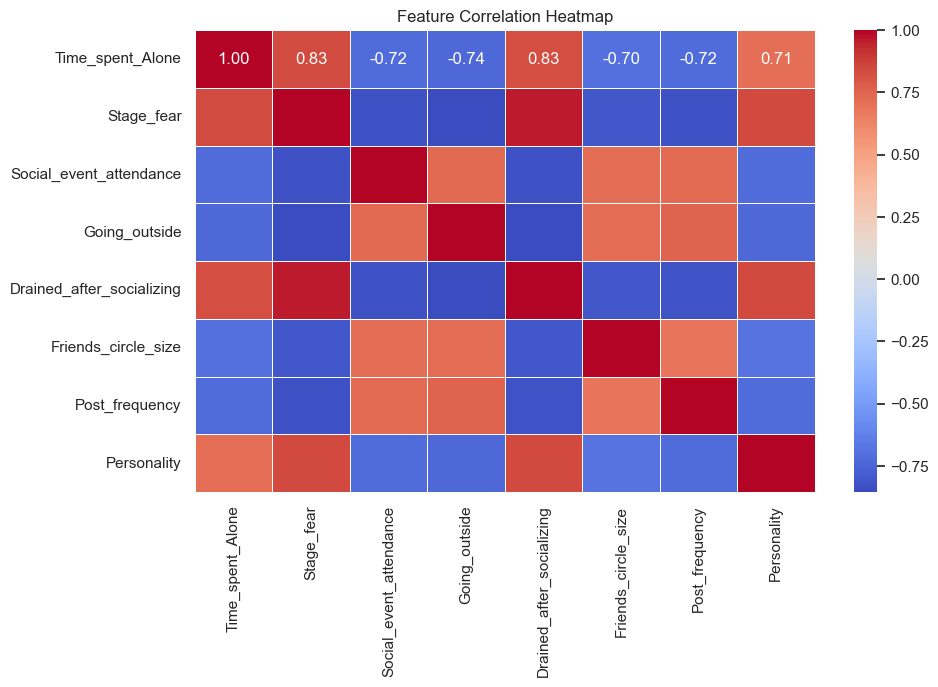

In [6]:
# 📊 Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
sns.set(style="whitegrid")

# 1. Personality Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df_processed)
plt.title("Personality Distribution (0 = Introvert, 1 = Extrovert)")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.show()

# 2. KDE plots for all numeric features by Personality

# Split the dataset into Introverts and Extroverts
introverts = df_processed[df_processed['Personality'] == 0]
extroverts = df_processed[df_processed['Personality'] == 1]

# Get numeric feature columns (excluding target)
numeric_features = df_processed.select_dtypes(include=['float64', 'int64']).columns.drop('Personality')

# KDE plots
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(introverts[col], label='Introvert')
    sns.kdeplot(extroverts[col], label='Extrovert')
    plt.title(f"Distribution of {col} by Personality")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df_processed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Here’s what we can observe visually:

Time_spent_Alone: Introverts tend to spend more time alone.

Social_event_attendance & Going_outside: Extroverts show higher activity.

Stage_fear & Drained_after_socializing: Introverts are more likely to report both.

Friends_circle_size: Extroverts usually have larger friend groups.

Post_frequency: Extroverts post more often on social media.



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



🔍 Logistic Regression Evaluation:
Accuracy: 0.9189655172413793
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       302
           1       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



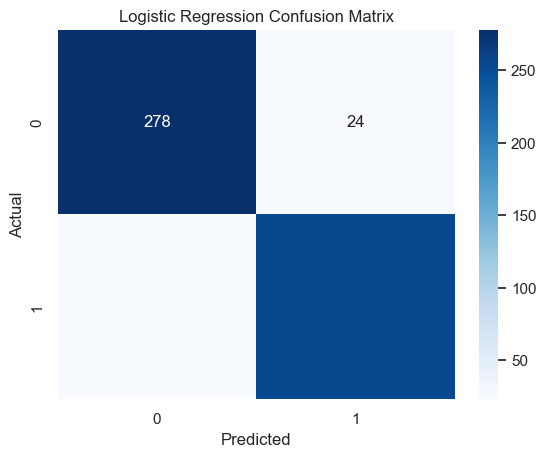


🔍 Random Forest Evaluation:
Accuracy: 0.9224137931034483
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



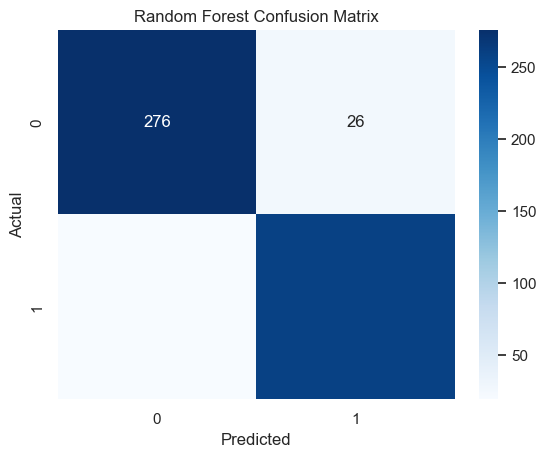

In [8]:
# Feature matrix and target
X = df_processed.drop('Personality', axis=1)
y = df_processed['Personality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



🔍 Support Vector Machine Evaluation:
Accuracy: 0.9293103448275862
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



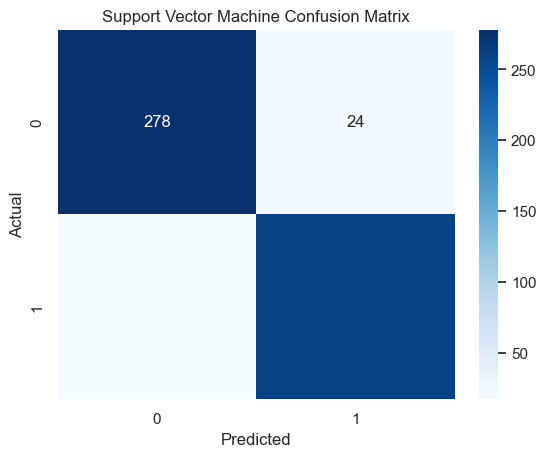


🔍 K-Nearest Neighbors Evaluation:
Accuracy: 0.9224137931034483
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       302
           1       0.91      0.93      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



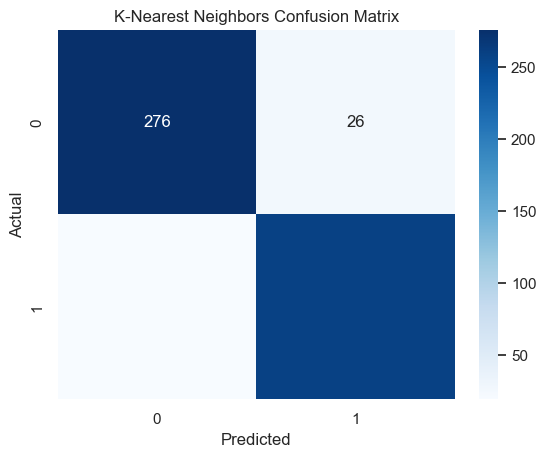


🔍 XGBoost Classifier Evaluation:
Accuracy: 0.9172413793103448
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       302
           1       0.90      0.93      0.91       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:31:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


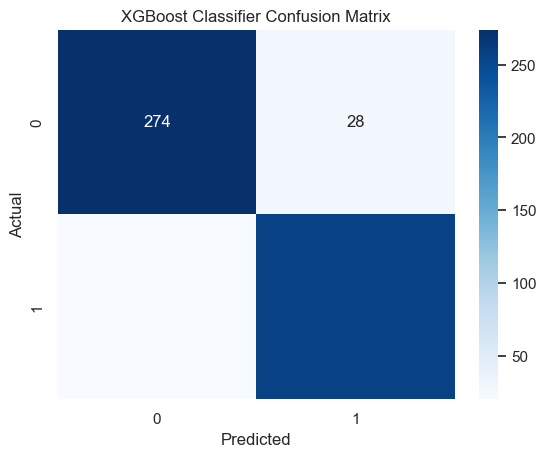


🔍 Tuned Random Forest Evaluation:
Accuracy: 0.9293103448275862
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



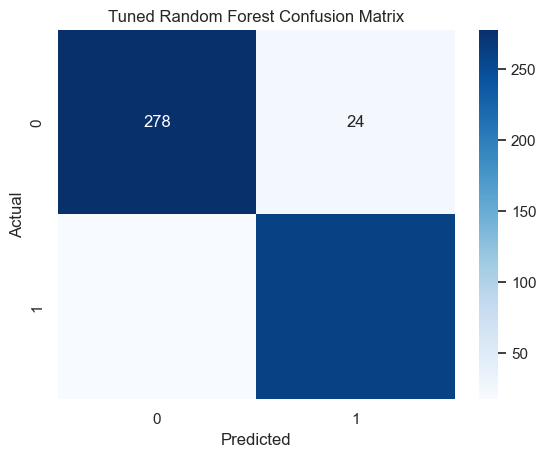

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:31:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i


🔍 Tuned XGBoost Evaluation:
Accuracy: 0.9293103448275862
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       302
           1       0.92      0.94      0.93       278

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



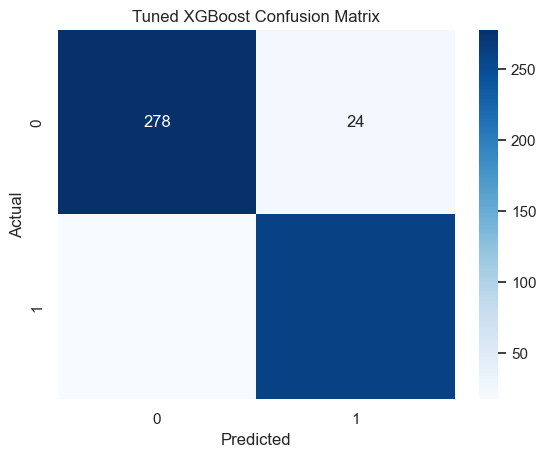

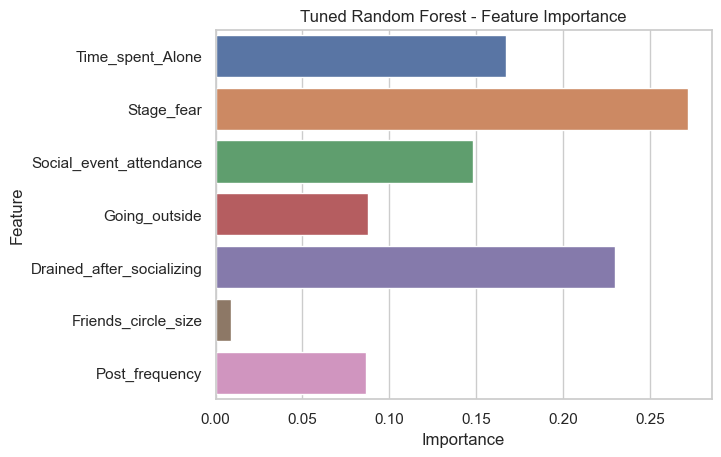

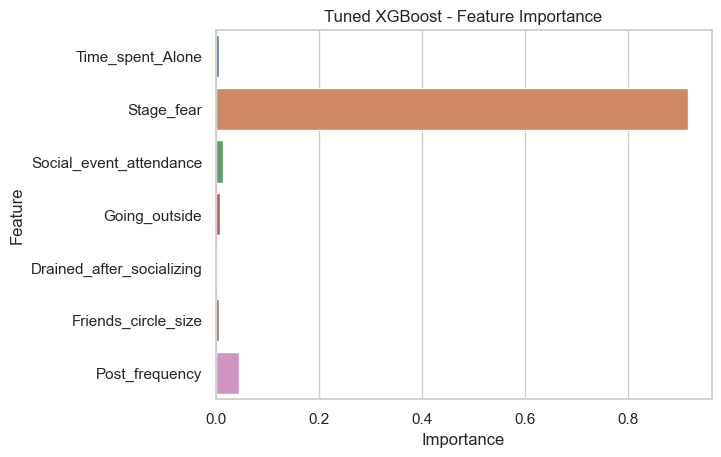

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, model_name)

# 1. Support Vector Machine
svm_model = SVC(kernel='rbf', C=1)
train_and_evaluate(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "Support Vector Machine")

# 2. K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "K-Nearest Neighbors")

# 3. XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_and_evaluate(xgb_model, X_train, X_test, y_train, y_test, "XGBoost Classifier")

# --- 🔧 Hyperparameter Tuning ---

# 4. Random Forest Tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
train_and_evaluate(best_rf, X_train, X_test, y_train, y_test, "Tuned Random Forest")

# 5. XGBoost Tuning
param_grid_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
train_and_evaluate(best_xgb, X_train, X_test, y_train, y_test, "Tuned XGBoost")

# --- 🌟 Feature Importance ---

# Plot feature importance for best models (if available)
def plot_feature_importance(model, model_name):
    try:
        importances = model.feature_importances_
        feature_names = X.columns
        sns.barplot(x=importances, y=feature_names)
        plt.title(f"{model_name} - Feature Importance")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()
    except:
        print(f"No feature importance for {model_name} (maybe not supported)")

plot_feature_importance(best_rf, "Tuned Random Forest")
plot_feature_importance(best_xgb, "Tuned XGBoost")


In [10]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
